# Logistic Regression Modeling

In [19]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, accuracy_score, make_scorer

import warnings
warnings.filterwarnings("ignore")

# 1.1 Load Data

In [20]:
# non-engineered data
df = pd.read_csv("train.csv")

# engineered data
df_eng = pd.read_csv("train_engineered.csv")

df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Spondylolisthesis
1,63.404481,14.115327,48.136806,49.289153,111.916008,31.784495,Spondylolisthesis
2,52.419385,19.011561,35.872660,33.407825,116.559771,1.694705,Hernia
3,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,Spondylolisthesis
4,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal


In [21]:
df_eng.head()

,lumbar_lordosis_angle,pelvic_radius,class__Hernia,class__Normal,class__Spondylolisthesis
0,85.101608,125.593624,0,0,1
1,48.136806,111.916007,0,0,1
2,35.872660,116.559771,1,0,0
3,84.620272,117.307897,0,0,1
4,46.902096,129.220682,0,1,0


# 1.2 One Hot Encode Target Variable

In [22]:
# ohe non-engineered data
dummies = pd.get_dummies(df["class"], prefix="class_")
df.drop("class", axis=1, inplace=True)
df = pd.concat([df, dummies], axis=1)

df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class__Hernia,class__Normal,class__Spondylolisthesis
0,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,0,0,1
1,63.404481,14.115327,48.136806,49.289153,111.916008,31.784495,0,0,1
2,52.419385,19.011561,35.872660,33.407825,116.559771,1.694705,1,0,0
3,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,0,0,1
4,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0,1,0


# 2.1 Preprocessing

Here I will seperate the independent and dependent variables. I will also scale the independent variables.

In [23]:
# seperate independent and dependent variables

targets = [col for col in df.columns if col.startswith("class")]

# non-engineered data
X = df.drop(targets, axis=1)
y_hernia = df["class__Hernia"]
y_spond = df["class__Spondylolisthesis"]

# engineered data
Xe = df_eng.drop(targets, axis=1)
ye_hernia = df_eng["class__Hernia"]
ye_spond = df_eng["class__Spondylolisthesis"]

X.shape, y_hernia.shape, y_spond.shape, Xe.shape, ye_hernia.shape, ye_spond.shape

((279, 6), (279,), (279,), (279, 2), (279,), (279,))

In [24]:
# scale data
sc = StandardScaler()

# non-engineered data
X = sc.fit_transform(X)

# engineered data
Xe = sc.fit_transform(Xe)

# 3.1 Baseline Models

Here I will look at the baseline performance of the default LogisticRegression model on the data sets. I will use cross validation.

In [25]:
# instantiate the default logistic regression model
clf = LogisticRegression()

In [26]:
# create a function to print desired scores
scorers = [make_scorer(g) for g in [recall_score, precision_score, accuracy_score]]

def find_scores(classifier, X, y, scorers):
    for scorer, score_type in zip(scorers, ["recall", "precision", "accuracy"]):
        print(f"\n\n{score_type}")
        results = cross_validate(clf, X, y, scoring=scorer, cv=4)["test_score"]
        print(results)
        print("avg:", sum(results)/4)
        print("var:", np.array(results).var())

# run function on non-engineered data pertaining to hernias
find_scores(clf, X, y_hernia, scorers)



recall
[0.71428571 0.64285714 0.53846154 0.61538462]
avg: 0.6277472527472527
var: 0.003960496920661758


precision
[0.71428571 0.9        0.63636364 0.66666667]
avg: 0.7293290043290043
var: 0.010481004385225166


accuracy
[0.88732394 0.91428571 0.85507246 0.86956522]
avg: 0.8815618347767765
var: 0.0004874149485120506


In [27]:
# find scores for non-engineered data pertaining to Spondylolisthesis
find_scores(clf, X, y_spond, scorers)



recall
[0.88235294 0.88235294 0.97058824 0.96969697]
avg: 0.9262477718360071
var: 0.0019268554529249732


precision
[0.96774194 1.         0.97058824 0.96969697]
avg: 0.9770067851187396
var: 0.00017728913817100975


accuracy
[0.92857143 0.94285714 0.97142857 0.97101449]
avg: 0.9534679089026915
var: 0.000340722773041163


In [28]:
# find scores for engineered data pertaining to hernia
find_scores(clf, Xe, ye_hernia, scorers)



recall
[0.21428571 0.57142857 0.30769231 0.23076923]
avg: 0.3310439560439561
var: 0.020504392585436536


precision
[0.6        0.72727273 0.4        0.75      ]
avg: 0.6193181818181818
var: 0.019301394628099173


accuracy
[0.81690141 0.87142857 0.7826087  0.84057971]
avg: 0.8278795964190944
var: 0.0010569452950857038


In [29]:
# find scores for engineered data pertaining to Spondylolisthesis
find_scores(clf, Xe, ye_spond, scorers)



recall
[0.76470588 0.73529412 0.85294118 0.93939394]
avg: 0.8230837789661319
var: 0.006383630262994846


precision
[0.86666667 0.83333333 0.80555556 0.86111111]
avg: 0.8416666666666667
var: 0.000594135802469136


accuracy
[0.82857143 0.8        0.82857143 0.89855072]
avg: 0.8389233954451346
var: 0.0013211938839808117


Overall the non-engineered data seemed to work the best so far.

# 4.1 Hyper paramerer tuning

Now I will tune the hyper parameters for the models. From now on I am only concerned with the non-engineered data.

In [30]:
# explore parameter tuning for finding hernias
params = {"C":[0.01, 0.1, 1, 10, 100]}
gscv = GridSearchCV(clf, params, cv=4)
gscv.fit(X, y_hernia)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
gscv.best_estimator_.get_params()["C"]

1

In [32]:
# baseline scores
find_scores(clf, X, y_hernia, scorers)



recall
[0.71428571 0.64285714 0.53846154 0.61538462]
avg: 0.6277472527472527
var: 0.003960496920661758


precision
[0.71428571 0.9        0.63636364 0.66666667]
avg: 0.7293290043290043
var: 0.010481004385225166


accuracy
[0.88732394 0.91428571 0.85507246 0.86956522]
avg: 0.8815618347767765
var: 0.0004874149485120506


In [33]:
# after tuning
find_scores(gscv.best_estimator_, X, y_hernia, scorers)



recall
[0.71428571 0.64285714 0.53846154 0.61538462]
avg: 0.6277472527472527
var: 0.003960496920661758


precision
[0.71428571 0.9        0.63636364 0.66666667]
avg: 0.7293290043290043
var: 0.010481004385225166


accuracy
[0.88732394 0.91428571 0.85507246 0.86956522]
avg: 0.8815618347767765
var: 0.0004874149485120506


In [34]:
# explore parameter tuning for finding hernias
params = {"C":[0.01, 0.1, 1, 10, 100]}
gscv2 = GridSearchCV(clf, params, cv=4)
gscv2.fit(X, y_spond)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
gscv2.best_estimator_.get_params()["C"]

100

In [36]:
# baseline scores
find_scores(clf, X, y_spond, scorers)



recall
[0.88235294 0.88235294 0.97058824 0.96969697]
avg: 0.9262477718360071
var: 0.0019268554529249732


precision
[0.96774194 1.         0.97058824 0.96969697]
avg: 0.9770067851187396
var: 0.00017728913817100975


accuracy
[0.92857143 0.94285714 0.97142857 0.97101449]
avg: 0.9534679089026915
var: 0.000340722773041163


In [37]:
# after tuning
find_scores(gscv2.best_estimator_, X, y_spond, scorers)



recall
[0.88235294 0.88235294 0.97058824 0.96969697]
avg: 0.9262477718360071
var: 0.0019268554529249732


precision
[0.96774194 1.         0.97058824 0.96969697]
avg: 0.9770067851187396
var: 0.00017728913817100975


accuracy
[0.92857143 0.94285714 0.97142857 0.97101449]
avg: 0.9534679089026915
var: 0.000340722773041163


# 5.1 Feature Importance

Here I will take a look at the coefficients of each feature.

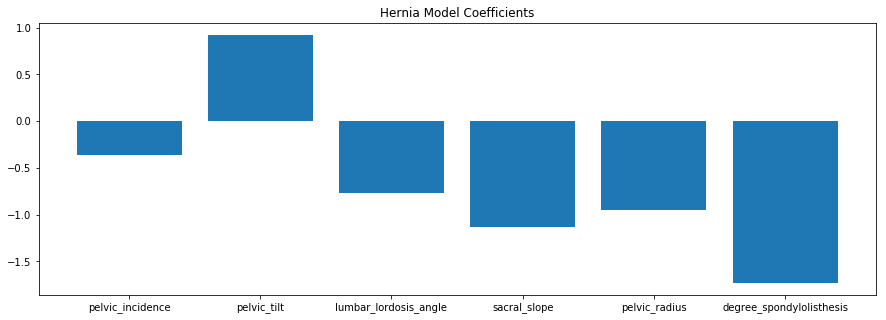

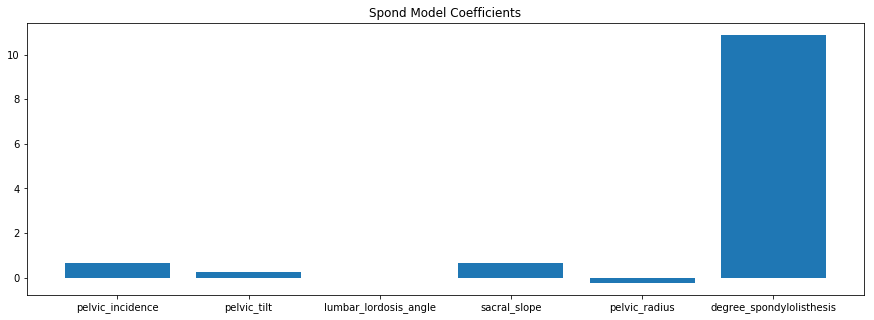

In [43]:
# save models
model_hernia = gscv.best_estimator_
model_spond = gscv2.best_estimator_

# save coeficients
cols = df.drop(targets, axis=1).columns
coef_hernia = model_hernia.coef_[0]
coef_spond = model_spond.coef_[0]

# plotting
plt.figure(figsize=(15, 5))
plt.bar(cols, coef_hernia)
plt.title("Hernia Model Coefficients")
plt.show()

print("\n\n\n")

plt.figure(figsize=(15, 5))
plt.bar(cols, coef_spond)
plt.title("Spond Model Coefficients")
plt.show()